In [49]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from geopy.geocoders import Nominatim
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier  # Ejemplo de modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression





In [50]:
pp = pd.read_csv('C:\\Users\\jvazquez1\\Desktop\\proyecto_data\\Ingenias_proyecto\\datos\\pautas_publicitarias_limpio.csv', sep=';', low_memory=False)


In [4]:
# Asegúrate de que 'Month' y 'Year' estén en un formato que pueda utilizarse como fecha
pp['Fecha'] = pd.to_datetime(pp['Year'].astype(str) + '-' + pp['Month'].astype(str) + '-01')

In [5]:
# Establece la fecha como el índice de tu DataFrame
pp.set_index('Fecha', inplace=True)

In [11]:
# Realiza la descomposición de la serie temporal
result = sm.tsa.seasonal_decompose(pp['Invoice amount gross home currency'], model='additive', period=12)


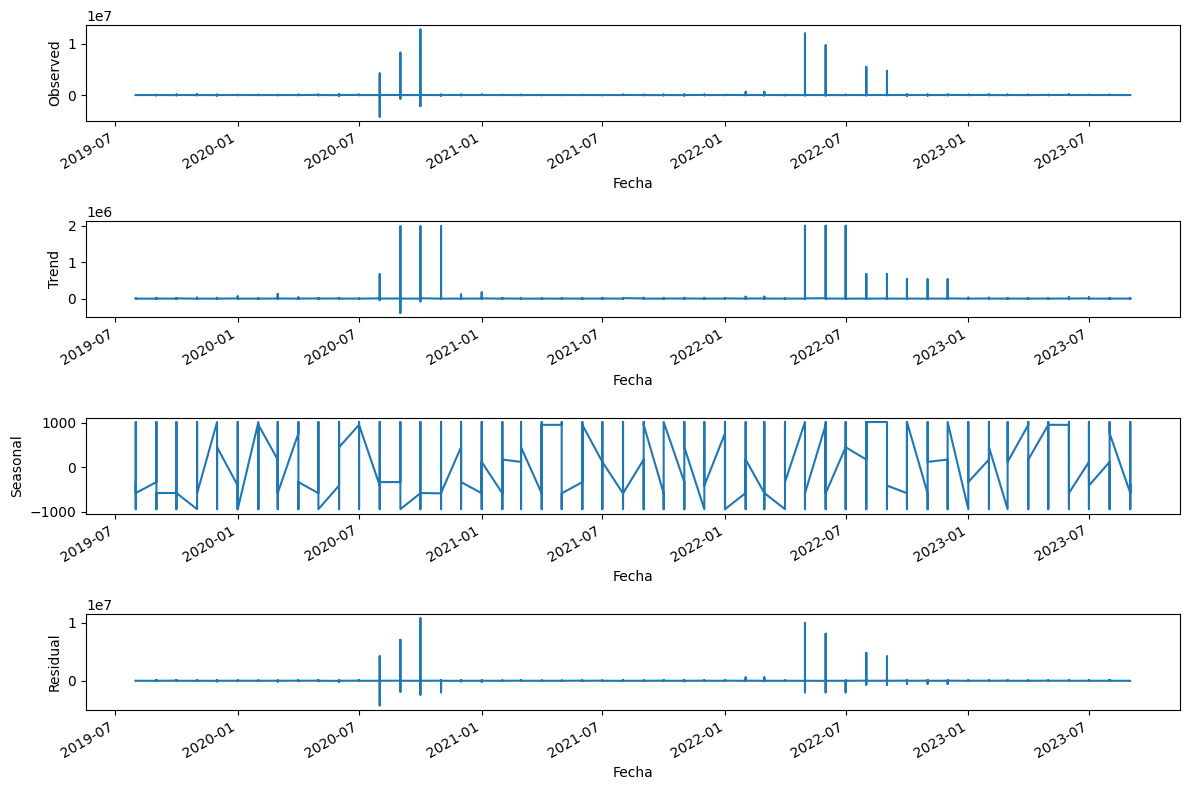

In [12]:
# Visualiza las componentes de la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

Desarrolla un modelo de regresión para predecir el gasto publicitario en función de las variables relevantes. Modelos como regresión lineal.

INTENTO 2

In [54]:
# Seleccionar características y variable objetivo
features = ['Month', 'Year', 'Channel code', 'Invoice amount net home currency']
target = 'Invoice amount gross home currency'

X = pp[features]
y = pp[target]
X = pd.get_dummies(pp[features], columns=['Channel code'])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio: 11700627194.010118
Coeficiente de determinación (R^2): 0.010823652525713268


INTENTO 3

In [53]:
# Crear una variable de clase binaria basada en "Incentive discount %"
pp['Incentive Class'] = pp['Incentive discount %'].apply(lambda x: 1 if x > 5 else 0)

# Seleccionar características y variable objetivo
features = ['Month', 'Year', 'Invoice amount gross home currency', 'Commission amount']
target = 'Incentive Class'

X = pp[features]
y = pp[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensibilidad):", recall)
print("Puntuación F1 (F1 Score):", f1)
print("Matriz de confusión:")
print(confusion)

Exactitud (Accuracy): 0.632996632996633
Precisión (Precision): 0.4790575916230366
Recall (Sensibilidad): 0.01788856304985337
Puntuación F1 (F1 Score): 0.03448925744440256
Matriz de confusión:
[[17489   199]
 [10047   183]]
